# IMPORTING NECESSARY LIBRARIES AND PACKAGES

In [1]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
import re
import numpy as np
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')





import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from wordcloud import WordCloud
import plotly.express as px


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/manish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/manish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/Users/manish/anaconda3/lib/python3.10/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


# LOADING THE DATASET AND PERFORMING EXPLORATORY DATA ANALYSIS

In [2]:
data = pd.read_csv('ChatGPT tweets.csv')

data

,Unnamed: 0,Date,user_name,user_friends,user_location,text
0,0,2023-01-10 23:59:58+00:00,TopengaNFT,4981,.eth,ChatGpT spittin bars https://t.co/3OhlCEaM5e
1,1,2023-01-10 23:59:58+00:00,disconcision,1535,Ann Arbor,"I would like to thank my parents, twitter and ..."
2,2,2023-01-10 23:59:56+00:00,archivedbridge,779,indy,me when chatGPT is down https://t.co/slTqH59kh3
3,3,2023-01-10 23:59:53+00:00,mint_bier,4444,🤠,@GentleErbdool 😭How can I live without ChatGPT?
4,4,2023-01-10 23:59:49+00:00,GopawsApp,22,Australia,"@BallerBets1 Don't worry, could still try our ..."
...,...,...,...,...,...,...
21510,1496,2023-01-09 21:11:31+00:00,rizkyaulya,1089,NaN,@RajneeshKeshari @OpenAI ChatGPT can only fetc...
21511,1497,2023-01-09 21:11:30+00:00,knkxfm,1409,"Seattle, WA","Some students have been using ChatGPT, a text-..."
21512,1498,2023-01-09 21:11:19+00:00,helpnewusername,195,NaN,@milfdev1l not me planning to use chatgpt in m...
21513,1499,2023-01-09 21:11:19+00:00,SatLeTissier,450,NaN,@Leishman @Adelgary Sounds like something Chat...


##### GENERATING THE WORDCLOUD FOR NON NULL TWEETS DATA

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


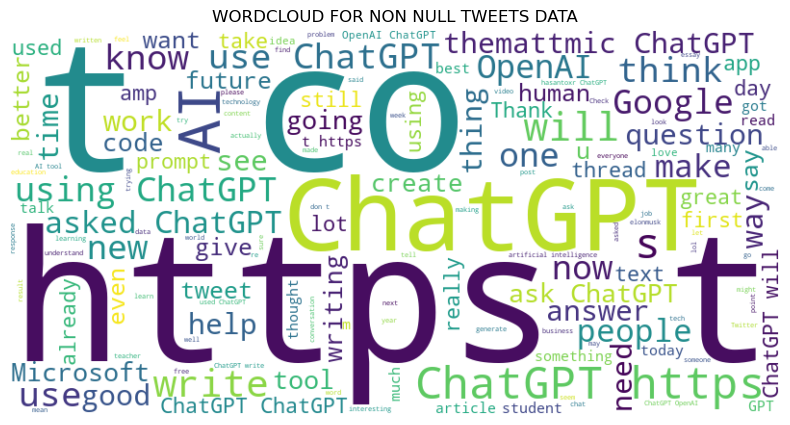

In [3]:
text= " ".join(tweet for tweet in data.text if pd.notna(tweet))

wordcloud= WordCloud(width=800, height=400, max_words=150, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WORDCLOUD FOR NON NULL TWEETS DATA")
plt.show()

In [4]:
data.shape

(21515, 6)

In [5]:
data.duplicated().sum()

13

In [6]:

data = data.drop_duplicates()

data = data.reset_index(drop=True)


In [7]:
data.duplicated().sum()

0

In [8]:
data

,Unnamed: 0,Date,user_name,user_friends,user_location,text
0,0,2023-01-10 23:59:58+00:00,TopengaNFT,4981,.eth,ChatGpT spittin bars https://t.co/3OhlCEaM5e
1,1,2023-01-10 23:59:58+00:00,disconcision,1535,Ann Arbor,"I would like to thank my parents, twitter and ..."
2,2,2023-01-10 23:59:56+00:00,archivedbridge,779,indy,me when chatGPT is down https://t.co/slTqH59kh3
3,3,2023-01-10 23:59:53+00:00,mint_bier,4444,🤠,@GentleErbdool 😭How can I live without ChatGPT?
4,4,2023-01-10 23:59:49+00:00,GopawsApp,22,Australia,"@BallerBets1 Don't worry, could still try our ..."
...,...,...,...,...,...,...
21497,1496,2023-01-09 21:11:31+00:00,rizkyaulya,1089,NaN,@RajneeshKeshari @OpenAI ChatGPT can only fetc...
21498,1497,2023-01-09 21:11:30+00:00,knkxfm,1409,"Seattle, WA","Some students have been using ChatGPT, a text-..."
21499,1498,2023-01-09 21:11:19+00:00,helpnewusername,195,NaN,@milfdev1l not me planning to use chatgpt in m...
21500,1499,2023-01-09 21:11:19+00:00,SatLeTissier,450,NaN,@Leishman @Adelgary Sounds like something Chat...


In [9]:
data['text'].isnull

<bound method Series.isnull of 0             ChatGpT spittin bars https://t.co/3OhlCEaM5e
1        I would like to thank my parents, twitter and ...
2          me when chatGPT is down https://t.co/slTqH59kh3
3          @GentleErbdool 😭How can I live without ChatGPT?
4        @BallerBets1 Don't worry, could still try our ...
                               ...                        
21497    @RajneeshKeshari @OpenAI ChatGPT can only fetc...
21498    Some students have been using ChatGPT, a text-...
21499    @milfdev1l not me planning to use chatgpt in m...
21500    @Leishman @Adelgary Sounds like something Chat...
21501                                                  NaN
Name: text, Length: 21502, dtype: object>

In [10]:
data.iloc[2151,5]

'idiot refers use chatgpt, retard do I have something of my own or Im just looking at wall'

In [11]:
all_text = ' '.join(data['text'].astype(str))
all_words = all_text.split()

word_counts = Counter(all_words)


In [12]:
most_common_words= word_counts.most_common()
most_common_words

[('ChatGPT', 9680),
 ('to', 8837),
 ('the', 7657),
 ('a', 6198),
 ('is', 5328),
 ('and', 4769),
 ('of', 4641),
 ('I', 4627),
 ('for', 3360),
 ('in', 3109),
 ('it', 2877),
 ('#ChatGPT', 2588),
 ('you', 2542),
 ('with', 2358),
 ('that', 2187),
 ('on', 2174),
 ('AI', 1763),
 ('be', 1660),
 ('this', 1501),
 ('can', 1495),
 ('about', 1495),
 ('my', 1303),
 ('are', 1257),
 ('by', 1200),
 ('will', 1190),
 ('an', 1156),
 ('have', 1091),
 ('use', 1068),
 ('The', 1063),
 ('chatgpt', 1032),
 ('like', 1027),
 ('your', 1023),
 ('as', 1019),
 ('not', 1000),
 ('but', 995),
 ('how', 993),
 ('-', 986),
 ('chatGPT', 966),
 ('just', 893),
 ('me', 881),
 ('at', 858),
 ('was', 837),
 ('write', 826),
 ('what', 825),
 ('using', 817),
 ('has', 816),
 ('from', 813),
 ('do', 756),
 ('This', 730),
 ('if', 672),
 ('or', 668),
 ('out', 639),
 ('asked', 596),
 ('so', 594),
 ('It', 592),
 ('all', 590),
 ('ChatGPT,', 577),
 ('new', 576),
 ('we', 569),
 ('more', 548),
 ('think', 531),
 ('some', 530),
 ('What', 518),
 

In [13]:
#CONVERTING THE LIST OF TUPLES INTO DICTIONARY FOR WORDCLOUD PLOT
twenty_most_common_words= dict(word_counts.most_common(20))
twenty_most_common_words


{'ChatGPT': 9680,
 'to': 8837,
 'the': 7657,
 'a': 6198,
 'is': 5328,
 'and': 4769,
 'of': 4641,
 'I': 4627,
 'for': 3360,
 'in': 3109,
 'it': 2877,
 '#ChatGPT': 2588,
 'you': 2542,
 'with': 2358,
 'that': 2187,
 'on': 2174,
 'AI': 1763,
 'be': 1660,
 'this': 1501,
 'can': 1495}

##### WORDCLOUD FOR WORDS BEFORE THE PREPROCESSING

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


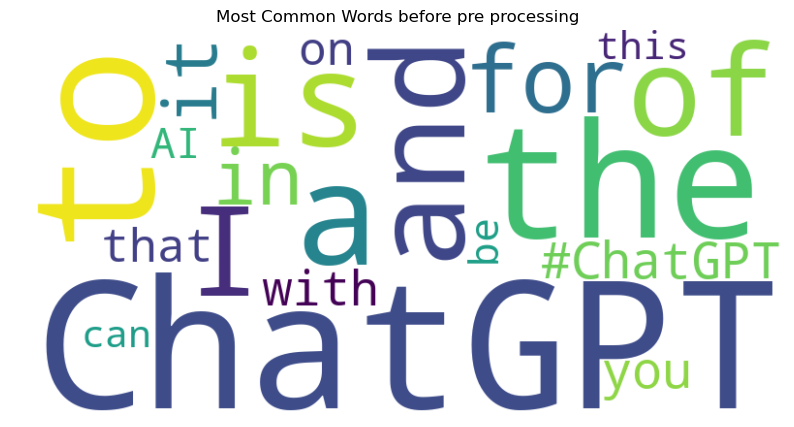

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(twenty_most_common_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Most Common Words before pre processing')
plt.show()



##### FIRST 20 USERS TWEETS AND ITS BAR PLOT

Top 20 User Tweets:
             user_name                                               text  \
8350      SaveToNotion  @ysftpl42 Saved this Tweet to your Notion data...   
8339      SaveToNotion  @science_engi This thread is saved to your Not...   
8331      SaveToNotion  @marker_eth This thread is saved to your Notio...   
8306      SaveToNotion  @deeeniseS This thread is saved to your Notion...   
17955      pensacola81  @OnlyBestClicks Hi! I discover a Free METHOD w...   
8333      SaveToNotion  @mommukalif This thread is saved to your Notio...   
12407     creativefold                                @themattmic ChatGPT   
12912     devopsdotcom  Will #ChatGPT Replace #Developers? https://t.c...   
4972      JettonMeador                                @HeyNikhila chatgpt   
8322      SaveToNotion  @internetmieze This thread is saved to your No...   
905       AnswersByAI_  Question for @OpenAI #ChatGPT 🤖 Is having a bi...   
8296      SaveToNotion  @TommyRozo This thread is saved 

/Users/manish/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/manish/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/manish/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129525 (\N{SPOOL OF THREAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


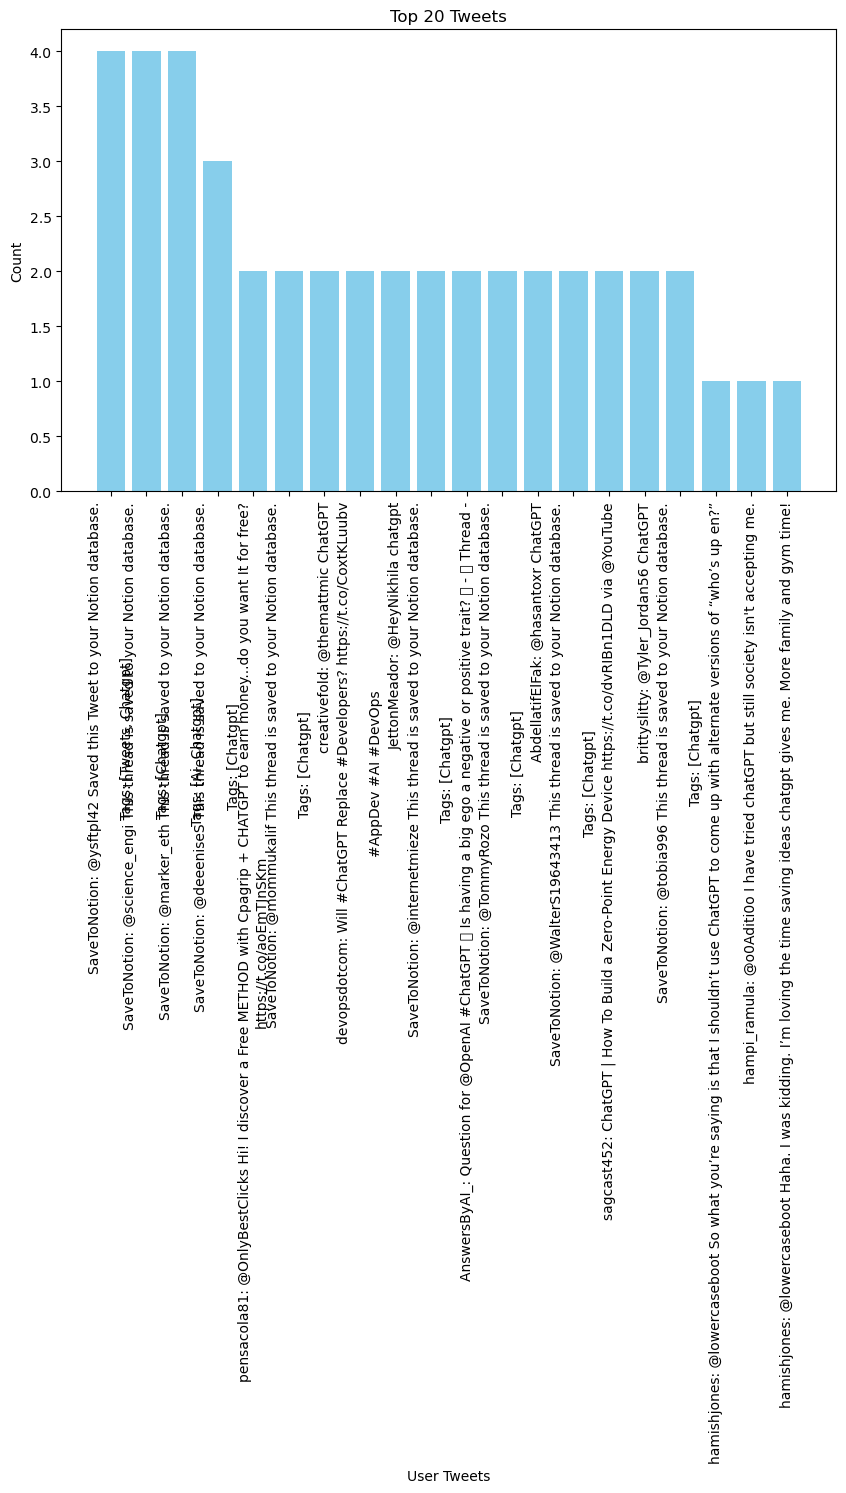

In [15]:
first_twenty_tweets = data.groupby(['user_name', 'text']).size().reset_index(name='count').sort_values('count', ascending=False).head(20)
print("Top 20 User Tweets:")
print(first_twenty_tweets)

plt.figure(figsize=(10, 6))
plt.bar(first_twenty_tweets['user_name'] + ': ' + first_twenty_tweets['text'], first_twenty_tweets['count'], color='skyblue')
plt.title('Top 20 Tweets')
plt.xlabel('User Tweets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
##############################################################################################################################################

# DATA PREPROCESSING

In [17]:


def preprocess_data(text):
    if pd.isnull(text):  #Checking if there are missing values
        return ""  #if there are any missing values

    
    #Converting to string 
    text = str(text) 
    
    #Converting the texts to lowercase
    text = text.lower() 
    
    #Removing digits
    text = re.sub(r'\d+', '', text)
    
    #Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Removing single quotes
    text = text.replace(" ’ ","").replace("”","").replace( " “ ","") .replace(" ” ","").replace(" ’ ", "").replace("’","") 
    
    stop_words = set(stopwords.words('english'))
    
    #Tokenizing text
    word_tokens = word_tokenize(text) 
    
    #Removing stop words
    filtered_text = [word for word in word_tokens if word not in stop_words and not re.match(r'http\S+', word)] 
    
    #Lemmatizing words
    lemmatizer = WordNetLemmatizer()
    
    cleaned_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    
    #POS TAGGER
    pos_tags = pos_tag(filtered_text)
    pos_lemmatized_text = [f"{word}_{pos}" for word, pos in zip(cleaned_text, pos_tags)]
    
    

    emoticon_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+",
        flags=re.UNICODE
    )
    return emoticon_pattern.sub(r'', ' '.join(cleaned_text))


data.loc[:,'text'] = data['text'].apply(preprocess_data)
data['text']

0                                      chatgpt spittin bar
1                  would like thank parent twitter chatgpt
2                                                  chatgpt
3                   gentleerbdool how live without chatgpt
4        ballerbets dont worry could still try chatgpt ...
                               ...                        
21497    rajneeshkeshari openai chatgpt fetch data prio...
21498    student using chatgpt textbased bot homework y...
21499             milfdevl planning use chatgpt final exam
21500    leishman adelgary sound like something chatgpt...
21501                                                     
Name: text, Length: 21502, dtype: object

##### TOP TWENTY WORDS AFTER PREPROCESSING AND ITS WORDCLOUD

Top 20 Words after preprocessing:
chatgpt: 18586
ai: 3052
use: 1297
like: 1151
openai: 1149
write: 970
using: 957
new: 812
im: 713
asked: 668
google: 668
get: 659
think: 631
know: 626
tool: 610
time: 584
one: 577
ask: 570
make: 568
people: 564


/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


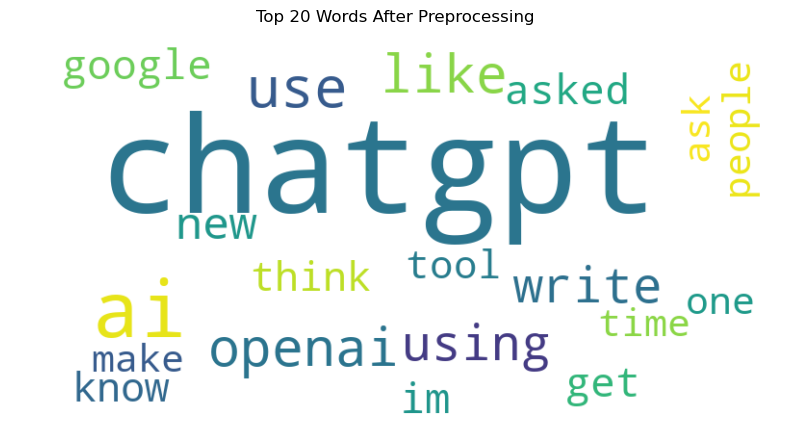

In [18]:
text_data = data['text']
all_text = ' '.join(text_data)

word_counts = Counter(all_text.split())

n_top_words = 20
top_words = dict(word_counts.most_common(n_top_words))

print("Top 20 Words after preprocessing:")
for word, count in top_words.items():
    print(f"{word}: {count}")

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 20 Words After Preprocessing")
plt.show()


/Users/manish/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manish/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


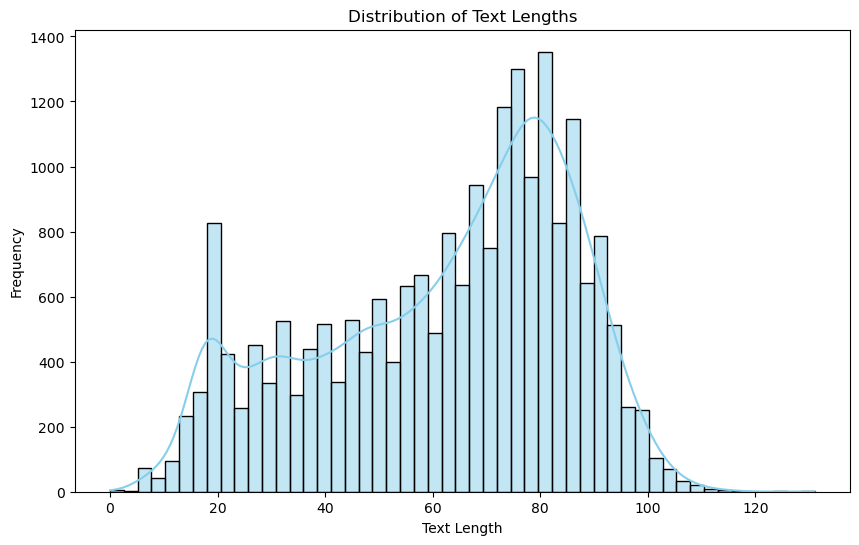

In [19]:


data.loc[:,'text_length'] = data['text'].apply(len) 
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [20]:
tweets= data['text']
tweets

0                                      chatgpt spittin bar
1                  would like thank parent twitter chatgpt
2                                                  chatgpt
3                   gentleerbdool how live without chatgpt
4        ballerbets dont worry could still try chatgpt ...
                               ...                        
21497    rajneeshkeshari openai chatgpt fetch data prio...
21498    student using chatgpt textbased bot homework y...
21499             milfdevl planning use chatgpt final exam
21500    leishman adelgary sound like something chatgpt...
21501                                                     
Name: text, Length: 21502, dtype: object

##### CREATING A DICTIONARY AND CORPUS

In [21]:

# Tokenizing each tweet into a list of words
tokenized_tweets = [word_tokenize(tweet) for tweet in tweets]


id2word = corpora.Dictionary(tokenized_tweets)


corpus = [id2word.doc2bow(tweet) for tweet in tokenized_tweets]




In [22]:
##############################################################################################################################################

# DEFINING THE LDA MODEL

In [24]:
import gensim
import pyLDAvis.gensim


lda_model = LdaModel(corpus, num_topics=15, id2word=id2word, passes=10)
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis_data)



In [25]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.144*"chatgpt" + 0.049*"asked" + 0.049*"write" + 0.043*"ask" + 0.026*"“" + '
  '0.021*"right" + 0.021*"got" + 0.020*"love" + 0.017*"take" + 0.012*"lol"'),
 (1,
  '0.278*"chatgpt" + 0.076*"themattmic" + 0.035*"gpt" + 0.029*"hasantoxr" + '
  '0.025*"chat" + 0.024*"post" + 0.016*"read" + 0.012*"add" + 0.012*"book" + '
  '0.011*"made"'),
 (2,
  '0.092*"google" + 0.060*"chatgpt" + 0.041*"tweet" + 0.028*"elonmusk" + '
  '0.024*"twitter" + 0.020*"replace" + 0.019*"last" + 0.019*"job" + '
  '0.017*"big" + 0.013*"dalle"'),
 (3,
  '0.100*"chatgpt" + 0.022*"student" + 0.015*"using" + 0.015*"youre" + '
  '0.015*"app" + 0.013*"tell" + 0.013*"well" + 0.012*"please" + '
  '0.012*"teacher" + 0.011*"game"'),
 (4,
  '0.104*"chatgpt" + 0.045*"dont" + 0.020*"artificial" + 0.020*"intelligence" '
  '+ 0.020*"need" + 0.019*"think" + 0.016*"asking" + 0.015*"change" + '
  '0.013*"conversation" + 0.012*"time"'),
 (5,
  '0.123*"chatgpt" + 0.021*"via" + 0.021*"ai" + 0.016*"use" + 0.015*"go" + '
  '0.015*

##### PRINTING THE TOP 15 TOPICS AFTER TOPIC MODELING DONE BY LDA MODEL

In [26]:

top_topics = lda_model.show_topics(num_topics=15, num_words=10, formatted=False)

datas = {}

for topic_idx, topic in top_topics:
    topic_label = f"Topic#{topic_idx + 1}"  
    datas[topic_label] = [word for word, _ in topic]


modeledtopic= pd.DataFrame(datas)
modeledtopic


,Topic#1,Topic#2,Topic#3,Topic#4,Topic#5,Topic#6,Topic#7,Topic#8,Topic#9,Topic#10,Topic#11,Topic#12,Topic#13,Topic#14,Topic#15
0,chatgpt,chatgpt,google,chatgpt,chatgpt,chatgpt,chatgpt,ai,chatgpt,chatgpt,chatgpt,chatgpt,chatgpt,chatgpt,chatgpt
1,asked,themattmic,chatgpt,student,dont,via,answer,chatgpt,human,use,like,tried,openai,tool,ive
2,write,gpt,tweet,using,artificial,ai,question,world,system,ai,get,feel,ai,search,great
3,ask,hasantoxr,elonmusk,youre,intelligence,use,like,openai,still,new,work,u,microsoft,ai,script
4,“,chat,twitter,app,need,go,written,art,thanks,school,ai,like,talk,model,never
5,right,post,replace,tell,think,youtube,look,chatbot,may,word,people,didnt,tech,language,write
6,got,read,last,well,asking,free,give,midjourney,part,thread,one,long,creator,using,thing
7,love,add,job,please,change,best,maybe,a…,access,content,im,everything,billion,used,start
8,take,book,big,teacher,conversation,know,asked,generated,good,via,better,task,news,bing,malware
9,lol,made,dalle,game,time,prompt,writes,robot,important,exploring,year,save,company,anyone,pretty


/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


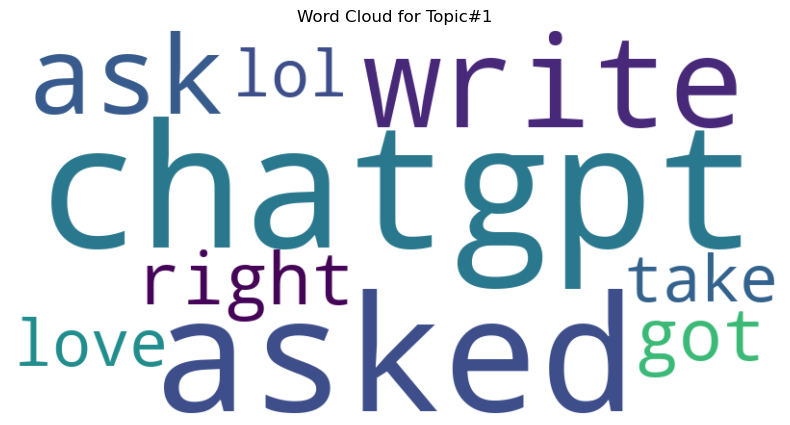

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


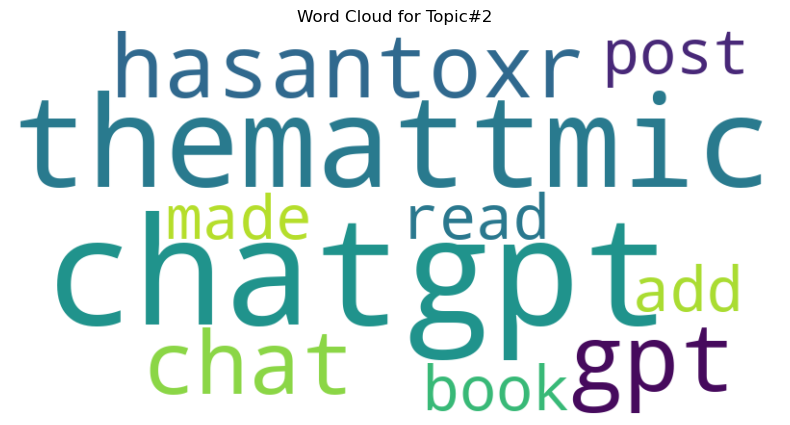

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


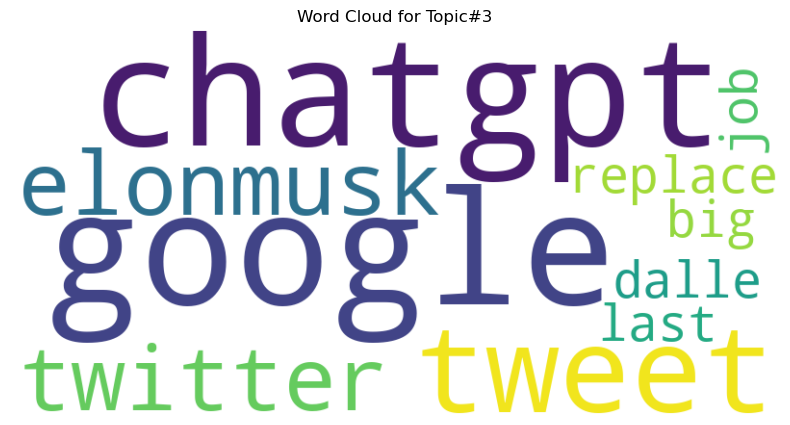

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


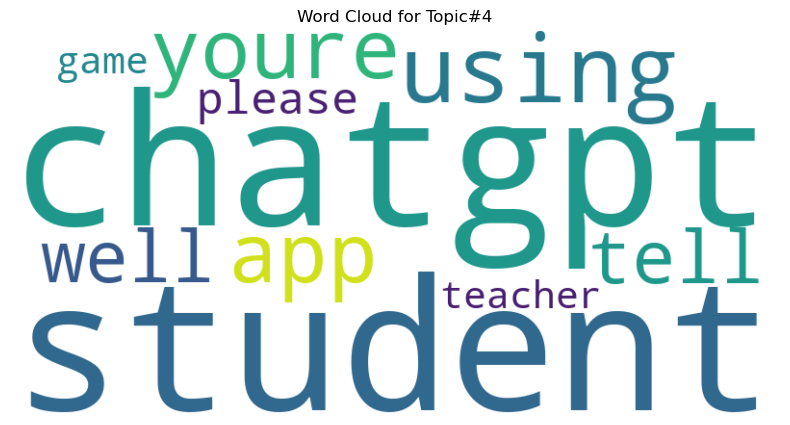

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


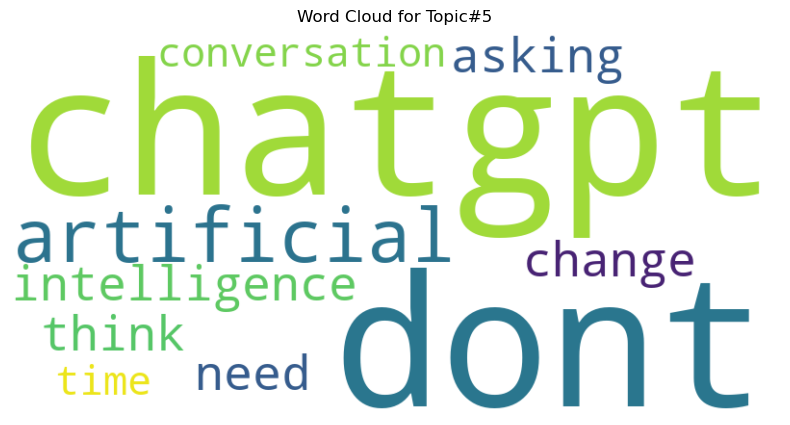

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


topics_columns = ['Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5']

for topic_col in topics_columns:
    
    text = ' '.join(modeledtopic[topic_col])

    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {topic_col}')
    plt.show()


##### CALCULATING THE PERPLEXITY TO MEASURE HOW GOOD THE MODEL IS 

In [31]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -11.351293978926767


##### CALCULATING THE MULTIPLE COHERENCE SCORES BY DEFINING  DIFFERENT ALPHA AND BETA VALUES TO EXAMINE THE EFFICIENCY OF THE MODEL

In [ ]:

k=15
alpha_values = ['auto', [0.3] * k, [0.6] * k]
beta_values = ['auto',  0.3, 0.6]

for alpha in alpha_values:
    for beta in beta_values:
        lda_model = LdaModel(corpus, num_topics=k, id2word=id2word, passes=15, alpha=alpha, eta=beta)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_tweets, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print(f'Alpha: {alpha}, Beta: {beta}, Coherence Score: {coherence_lda}')


In [28]:


def get_dominant_topic(lda_model, corpus):
    return [max(doc, key=lambda x: x[1])[0] for doc in lda_model[corpus]]

def get_document_topics(lda_model, corpus):
    return list(lda_model[corpus])

datas = {'Document': [], 'Dominant Topic': [], 'Keywords': [], 'Contribution (%)': [], 'Top Topic Words': []}

dominant_topics = get_dominant_topic(lda_model, corpus)
document_topics = get_document_topics(lda_model, corpus)

for i, (topic, document) in enumerate(zip(dominant_topics, document_topics)):
    top_topic = lda_model.print_topic(topic) if document else ""
    top_keywords = [word for word, _ in lda_model.show_topic(topic)] if document else []
    contribution_percentage = document[0][1] * 100 if document else 0.0

    datas['Document'].append(i + 1)
    datas['Dominant Topic'].append(topic)
    datas['Keywords'].append(', '.join(top_keywords))
    datas['Contribution (%)'].append(contribution_percentage)  
    datas['Top Topic Words'].append(top_topic)

df = pd.DataFrame(datas)


In [29]:
df

,Document,Dominant Topic,Keywords,Contribution (%),Top Topic Words
0,1,11,"chatgpt, tried, feel, u, like, didnt, long, ev...",2.222196,"0.049*""chatgpt"" + 0.027*""tried"" + 0.021*""feel""..."
1,2,10,"chatgpt, like, get, work, ai, people, one, im,...",18.989722,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
2,3,1,"chatgpt, themattmic, gpt, hasantoxr, chat, pos...",3.333343,"0.278*""chatgpt"" + 0.076*""themattmic"" + 0.035*""..."
3,4,10,"chatgpt, like, get, work, ai, people, one, im,...",1.666687,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
4,5,4,"chatgpt, dont, artificial, intelligence, need,...",52.938765,"0.104*""chatgpt"" + 0.045*""dont"" + 0.020*""artifi..."
...,...,...,...,...,...
21497,21498,10,"chatgpt, like, get, work, ai, people, one, im,...",22.879109,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
21498,21499,3,"chatgpt, student, using, youre, app, tell, wel...",67.003167,"0.100*""chatgpt"" + 0.022*""student"" + 0.015*""usi..."
21499,21500,10,"chatgpt, like, get, work, ai, people, one, im,...",1.111258,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
21500,21501,10,"chatgpt, like, get, work, ai, people, one, im,...",23.790707,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."


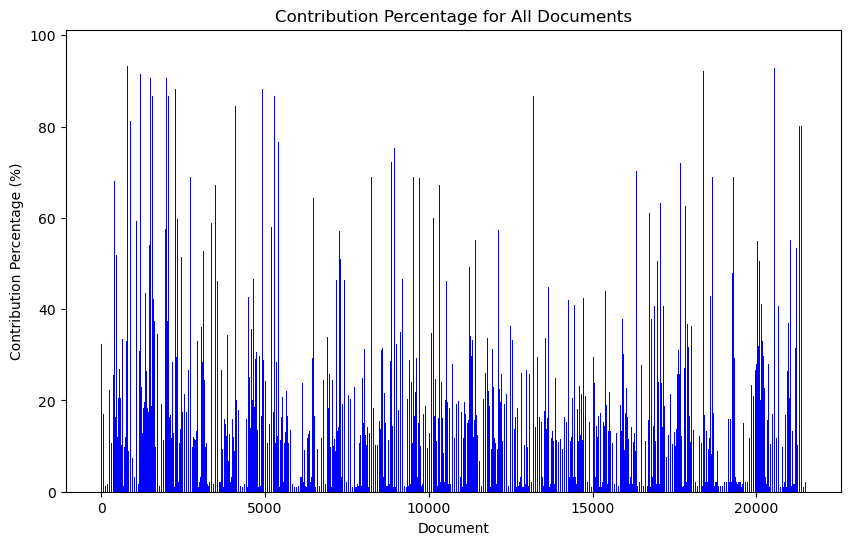

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(df['Document'], df['Contribution (%)'], color='blue')
plt.title('Contribution Percentage for All Documents')
plt.xlabel('Document')
plt.ylabel('Contribution Percentage (%)')
plt.show()


##### GETTING THE DOMINANT TOPIC FOR EACH DOCUMENT IN THE CORPUS

In [32]:

subset_df = df.head(15)
subset_df

,Document,Dominant Topic,Keywords,Contribution (%),Top Topic Words
0,1,11,"chatgpt, tried, feel, u, like, didnt, long, ev...",2.222196,"0.049*""chatgpt"" + 0.027*""tried"" + 0.021*""feel""..."
1,2,10,"chatgpt, like, get, work, ai, people, one, im,...",18.989722,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
2,3,1,"chatgpt, themattmic, gpt, hasantoxr, chat, pos...",3.333343,"0.278*""chatgpt"" + 0.076*""themattmic"" + 0.035*""..."
3,4,10,"chatgpt, like, get, work, ai, people, one, im,...",1.666687,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
4,5,4,"chatgpt, dont, artificial, intelligence, need,...",52.938765,"0.104*""chatgpt"" + 0.045*""dont"" + 0.020*""artifi..."
5,6,6,"chatgpt, answer, question, like, written, look...",9.595931,"0.069*""chatgpt"" + 0.068*""answer"" + 0.068*""ques..."
6,7,4,"chatgpt, dont, artificial, intelligence, need,...",52.933639,"0.104*""chatgpt"" + 0.045*""dont"" + 0.020*""artifi..."
7,8,1,"chatgpt, themattmic, gpt, hasantoxr, chat, pos...",3.333346,"0.278*""chatgpt"" + 0.076*""themattmic"" + 0.035*""..."
8,9,10,"chatgpt, like, get, work, ai, people, one, im,...",14.474465,"0.120*""chatgpt"" + 0.018*""like"" + 0.018*""get"" +..."
9,10,13,"chatgpt, tool, search, ai, model, language, us...",37.034705,"0.078*""chatgpt"" + 0.041*""tool"" + 0.032*""search..."


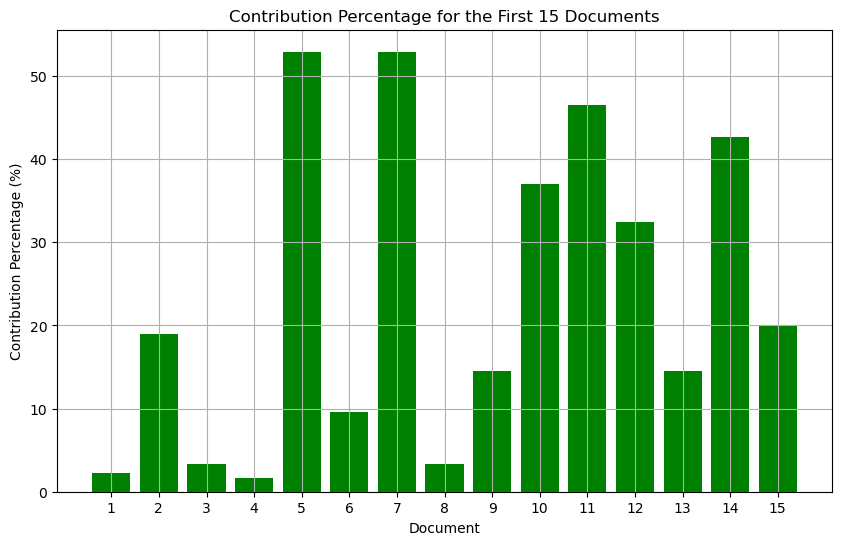

In [33]:

plt.figure(figsize=(10, 6))
plt.bar(subset_df['Document'], subset_df['Contribution (%)'], color='green')
plt.title('Contribution Percentage for the First 15 Documents')
plt.xlabel('Document')
plt.ylabel('Contribution Percentage (%)')


plt.xticks(subset_df['Document'])

plt.grid(True)
plt.show()


In [34]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px

fig = px.box(df, x='Keywords', y='Contribution (%)', title='Distribution of Document Word Count by Document Topic',
             labels={'Keywords': 'Keyword of Dominant Topic', 'Contribution (%)': 'Document Word Count'})

fig.update_layout(
    xaxis=dict(type='category'),
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=1,
            y=1.1,
            buttons=[
                dict(label="Zoom In", args=[{"visible": [True, False]}, {"mode": "zoom", "direction": "in"}]),
                dict(label="Zoom Out", args=[{"visible": [True, False]}, {"mode": "zoom", "direction": "out"}]),
                dict(label="Pan", args=[{"visible": [True, False]}, {"mode": "pan"}]),
            ],
        ),
    ],
)

fig.show()



# NON-NEGATIVE METRIX FACTORIZATION(NMF)

In [44]:
pip install pandas numpy gensim scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt


data = pd.read_csv('ChatGPT tweets.csv')  

In [46]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)


# DATA PREPROCESSING

In [47]:


def preprocess_data(text):
    if pd.isnull(text):  #Checking if there are missing values
        return ""  #if there are any missing values

    
    #Converting to string 
    text = str(text) 
    
    #Converting the texts to lowercase
    text = text.lower() 
    
    #Removing digits
    text = re.sub(r'\d+', '', text)
    
    #Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Removing single quotes
    text = text.replace(" ’ ","").replace( " ” ","") .replace(" ” ","").replace(" ’ ", "").replace("’","") 
    
    stop_words = set(stopwords.words('english'))
    
    #Tokenizing text
    word_tokens = word_tokenize(text) 
    
    #Removing stop words
    filtered_text = [word for word in word_tokens if word not in stop_words and not re.match(r'http\S+', word)] 
    
    #Lemmatizing words
    lemmatizer = WordNetLemmatizer()
    
    cleaned_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    
    #POS TAGGER
    pos_tags = pos_tag(filtered_text)
    pos_lemmatized_text = [f"{word}_{pos}" for word, pos in zip(cleaned_text, pos_tags)]
    
    

    emoticon_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+",
        flags=re.UNICODE
    )
    return emoticon_pattern.sub(r'', ' '.join(cleaned_text))


data.loc[:,'text'] = data['text'].apply(preprocess_data)


In [48]:
df= data['text']
df

0                                      chatgpt spittin bar
1                  would like thank parent twitter chatgpt
2                                                  chatgpt
3                   gentleerbdool how live without chatgpt
4        ballerbets dont worry could still try chatgpt ...
                               ...                        
21497    rajneeshkeshari openai chatgpt fetch data prio...
21498    student using chatgpt textbased bot homework y...
21499             milfdevl planning use chatgpt final exam
21500    leishman adelgary sound like something chatgpt...
21501                                                     
Name: text, Length: 21502, dtype: object

##### CREATING A TFIDF VECTORIZER

In [49]:

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df)

##### FITTING THE Non Negative Matrix Function MODEL

In [50]:
num_topics = 5  
model= NMF(n_components=num_topics, random_state=42)
model.fit_transform(tfidf_matrix)

array([[2.71057657e-02, 6.33814830e-05, 6.20893561e-05, 0.00000000e+00,
        0.00000000e+00],
       [1.94667823e-02, 0.00000000e+00, 0.00000000e+00, 1.10751886e-02,
        5.89673010e-03],
       [1.82418758e-01, 9.88368542e-04, 9.80722473e-04, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.49048853e-02, 3.54364979e-04, 3.46863692e-04, 0.00000000e+00,
        8.92110313e-02],
       [1.85527563e-02, 0.00000000e+00, 0.00000000e+00, 1.28935429e-02,
        2.95843992e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [51]:

feature_names = vectorizer.get_feature_names_out()
word_dict = {}

for i in range(num_topics):
    words_idx = model.components_[i].argsort()[:-10 - 1:-1]
    words = [feature_names[key] for key in words_idx]
    word_dict[f'Topic #{i + 1}'] = words
    
top_words_df = pd.DataFrame(word_dict)
print(top_words_df)
top_words_df


  Topic #1      Topic #2      Topic #3   Topic #4    Topic #5
0  chatgpt    themattmic     hasantoxr         ai         use
1      ask       chatgpt       chatgpt     openai       write
2    asked        thanks  productivity       tool         way
3    write      received           yes        new        case
4    using  productivity         limit       like      prompt
5     know         share          test      using        word
6     like          tool        replit    chatbot        dont
7   google         thank       messing  microsoft     outlook
8    think           way       partner      world      people
9  written    incredible         speak        gpt  powerpoint


,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5
0,chatgpt,themattmic,hasantoxr,ai,use
1,ask,chatgpt,chatgpt,openai,write
2,asked,thanks,productivity,tool,way
3,write,received,yes,new,case
4,using,productivity,limit,like,prompt
5,know,share,test,using,word
6,like,tool,replit,chatbot,dont
7,google,thank,messing,microsoft,outlook
8,think,way,partner,world,people
9,written,incredible,speak,gpt,powerpoint


/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


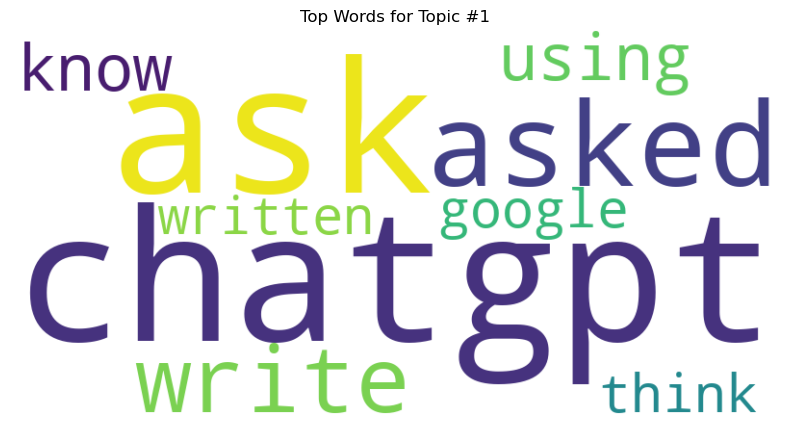

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


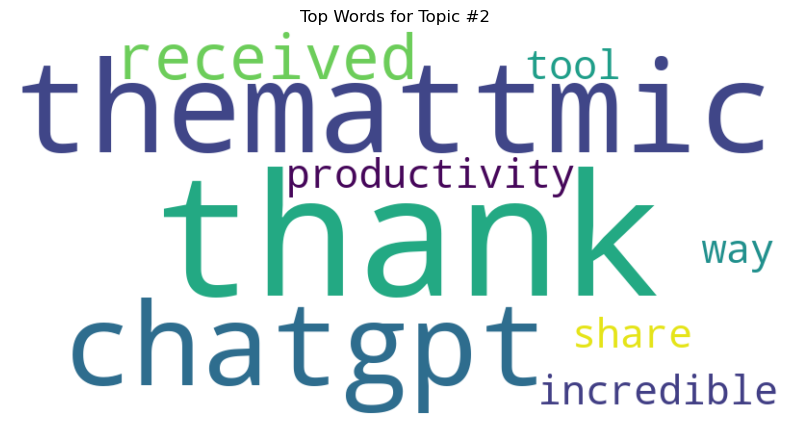

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


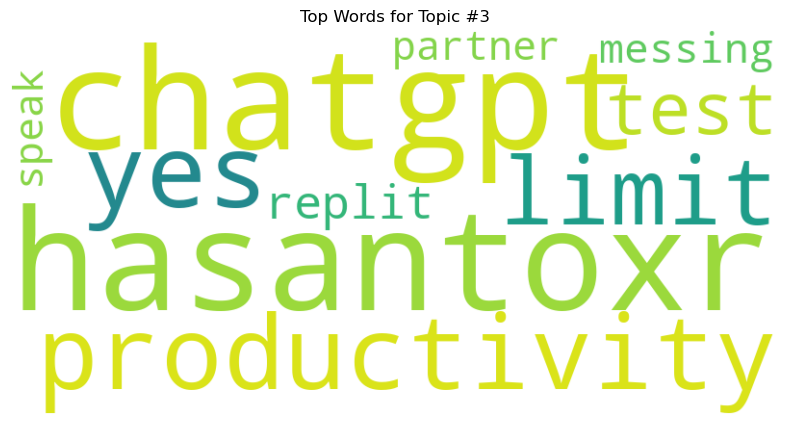

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


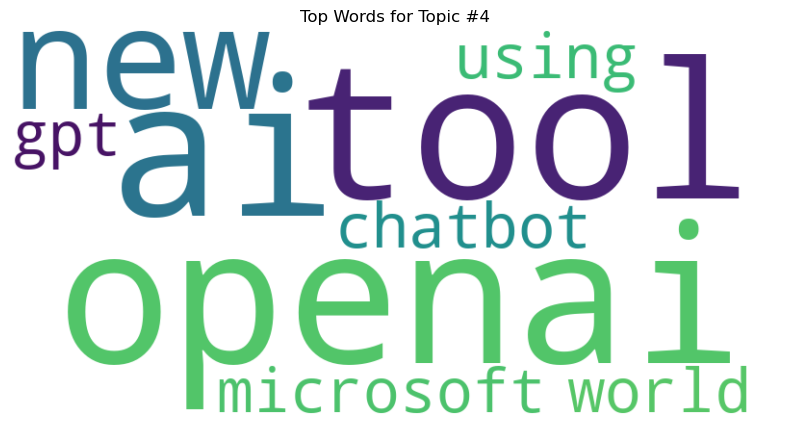

/Users/manish/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


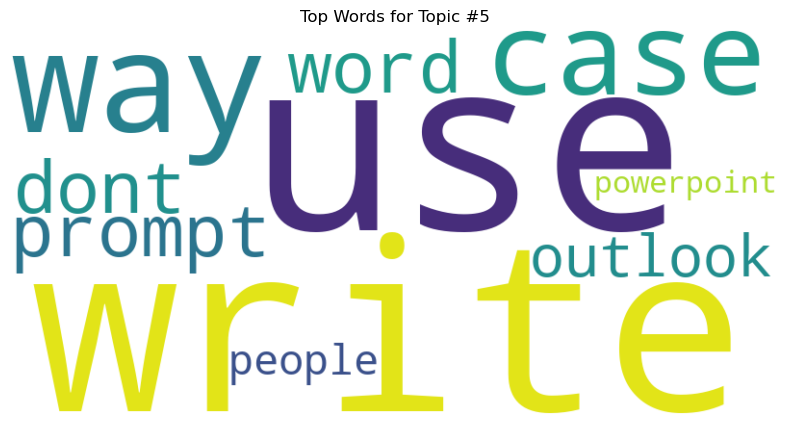

In [52]:

for i in range(num_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_dict[f'Topic #{i + 1}']))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words for Topic #{i + 1}")
    plt.show()
